### The most common cause of death in Americans between 1999 and 2017.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data-sci\\NCHS2.csv')

In [35]:
df.sample(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1414,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Oregon,762,17.8
1747,2014,Diabetes mellitus (E10-E14),Diabetes,Illinois,2712,18.7
3053,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Utah,270,12.4
78,2017,Alzheimer's disease (G30),Alzheimer's disease,Nebraska,698,28.5
9051,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Mississippi,294,10.5
6204,2005,Alzheimer's disease (G30),Alzheimer's disease,North Carolina,2417,30.5
982,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Illinois,2518,17.0
5670,2006,Alzheimer's disease (G30),Alzheimer's disease,Florida,4689,19.3
566,2016,Alzheimer's disease (G30),Alzheimer's disease,Colorado,1835,34.7
4207,2009,Cerebrovascular diseases (I60-I69),Stroke,Missouri,3017,44.9


In [36]:
sum = df['Deaths'].sum()
sum_fm = format(sum, ',')

print('Total deaths:', sum_fm)

Total deaths: 36,280,583


In [37]:
df_ca = df[(df.Year == 2017) & (df.State == 'California')]
df_ca

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2
55,2017,Alzheimer's disease (G30),Alzheimer's disease,California,16238,37.1
106,2017,Cerebrovascular diseases (I60-I69),Stroke,California,16355,37.6
157,2017,Chronic lower respiratory diseases (J40-J47),CLRD,California,13881,32.2
208,2017,Diabetes mellitus (E10-E14),Diabetes,California,9595,22.1
259,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,62797,142.9
310,2017,Influenza and pneumonia (J09-J18),Influenza and pneumonia,California,6340,14.6
361,2017,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,California,4312,10.5
412,2017,Malignant neoplasms (C00-C97),Cancer,California,59516,136.8
463,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,California,3887,8.9


In [38]:
sum_diabetes_sum = df[df['Cause Name'] == 'Diabetes']['Deaths'].sum()

print('Total deaths of diabetes :', format(sum_diabetes_sum, ','))

suicide_2015_2017 = df[(df['Cause Name'] == 'Suicide') &
                       (df['Year'] >= 2015) & (df['Year'] <= 2017)]

sum_suicide = suicide_2015_2017['Deaths'].sum()

print('Total deaths of suicide between 2015-2017 :', 
      format(sum_suicide, ','))

Total deaths of diabetes : 1,399,943
Total deaths of suicide between 2015-2017 : 136,331


In [40]:
df_y10 = df[df.Year >= 2010].groupby('Year').sum()
df_y10[['Deaths']].style.format('{:,}')

,Deaths
Year,
2010,"1,852,349"
2011,"1,869,321"
2012,"1,876,588"
2013,"1,910,311"
2014,"1,938,408"
2015,"2,013,017"
2016,"2,034,119"
2017,"2,081,531"


In [41]:
death_10 = df.groupby('State').sum().sort_values(by='Deaths', ascending=False)
death_10[['Deaths']].head(10).style.format('{:,}')

,Deaths
State,
California,"3,594,261"
Florida,"2,533,472"
Texas,"2,367,695"
New York,"2,264,120"
Pennsylvania,"1,854,953"
Ohio,"1,605,250"
Illinois,"1,508,039"
Michigan,"1,313,813"
North Carolina,"1,115,953"


In [42]:
cause_des = df.groupby(['Cause Name']).sum().sort_values(by='Deaths', ascending=False)
cause_des[['Deaths']].style.format('{:,}')

,Deaths
Cause Name,
Heart disease,"12,222,640"
Cancer,"10,843,644"
Stroke,"2,726,523"
CLRD,"2,594,927"
Unintentional injuries,"2,347,820"
Alzheimer's disease,"1,494,816"
Diabetes,"1,399,943"
Influenza and pneumonia,"1,094,641"
Kidney disease,"858,613"


<AxesSubplot:xlabel='Year'>

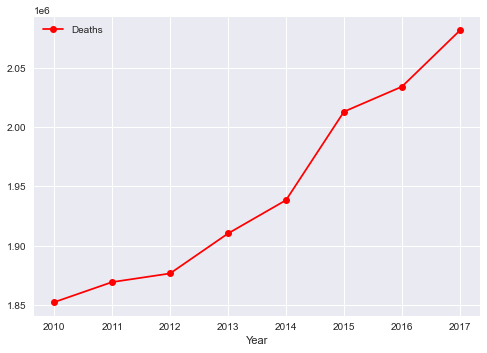

In [44]:
df_y10[['Deaths']].plot(kind='line', style='ro-')

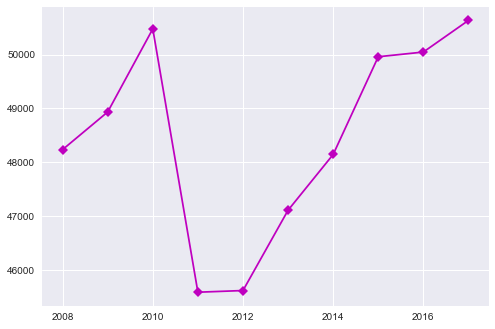

In [45]:
df_plot = df[(df.Year >= 2008) & (df['Cause Name'] == 'Kidney disease')]
df_plot = df_plot.groupby('Year').sum()

plt.plot(df_plot.index, df_plot['Deaths'], 'mD-')
plt.show()

<AxesSubplot:xlabel='Cause Name'>

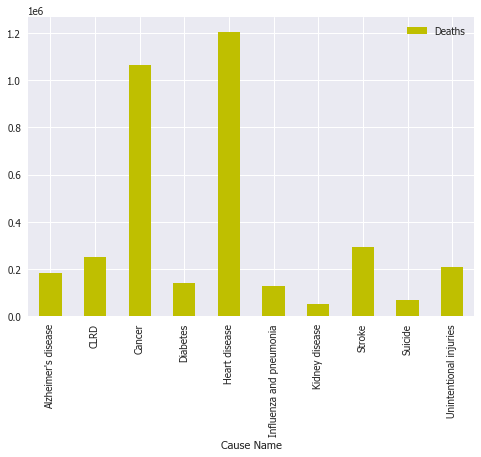

In [46]:
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = 'tahoma'
plt.rcParams['font.family'] = 'tahoma'
plt.rcParams['font.size'] = 14

df = pd.read_csv('data-sci\\NCHS2.csv')
df = df[df.State == 'California'].groupby('Cause Name').sum()

#display(df)

df[['Deaths']].plot.bar(color='y')